In [44]:
import numpy as np

# parse as CSV
# 
data =  np.genfromtxt("measurements/drehungen.csv", delimiter=",", skip_header=12, names=[
  "PacketCounter","SampleTimeFine","Quat_W","Quat_X","Quat_Y","Quat_Z","FreeAcc_X","FreeAcc_Y","FreeAcc_Z"
], dtype=(int, int, float, float, float, float , float, float, float ))
# normalize sample time fine

data["SampleTimeFine"] -= data["SampleTimeFine"][0]
# X=17178410. x=7915785.2 35368972.
# data = data[data["SampleTimeFine"] > 27207765]
# # 103630640.8 121547587.
# data = data[data["SampleTimeFine"] < 49546441]

# normalize again
data["SampleTimeFine"] -= data["SampleTimeFine"][0]



In [45]:
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
plt.ion()

In [46]:
%matplotlib widget

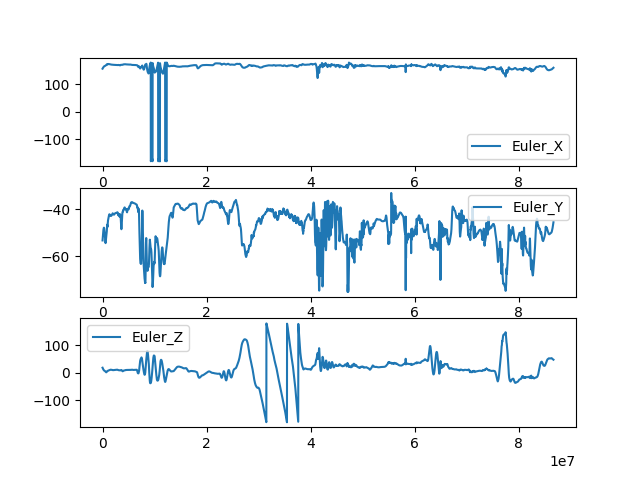

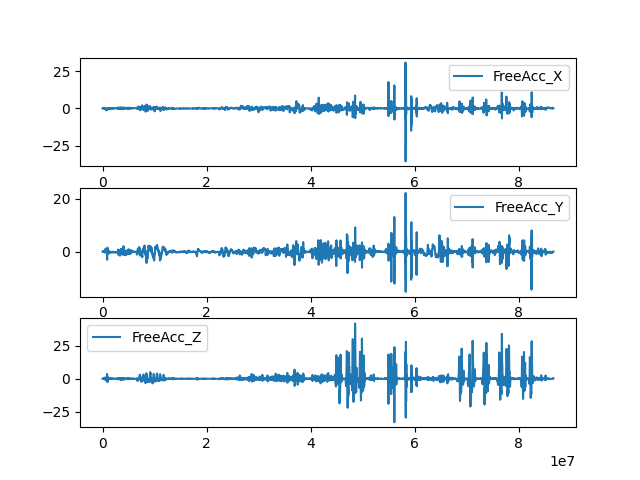

In [47]:

# plot free acc x,y,z above each other, in different plots above each other
plt.figure()
plt.subplot(3,1,1)
plt.plot(data["SampleTimeFine"], data["FreeAcc_X"])
plt.legend(["FreeAcc_X"])
plt.subplot(3,1,2)
plt.plot(data["SampleTimeFine"], data["FreeAcc_Y"])
plt.legend(["FreeAcc_Y"])
plt.subplot(3,1,3)
plt.plot(data["SampleTimeFine"], data["FreeAcc_Z"])
plt.legend(["FreeAcc_Z"])

# plot rotation quaternion as euler angles

# convert quaternion to euler angles

eulers = R.from_quat(np.vstack([data["Quat_X"], data["Quat_Y"], data["Quat_Z"], data["Quat_W"]]).T).as_euler("xyz", degrees=True)

plt.figure()
plt.subplot(3,1,1)
plt.plot(data["SampleTimeFine"], eulers[:,0])
plt.legend(["Euler_X"])
plt.subplot(3,1,2)
plt.plot(data["SampleTimeFine"], eulers[:,1])
plt.legend(["Euler_Y"])
plt.subplot(3,1,3)
plt.plot(data["SampleTimeFine"], eulers[:,2])
plt.legend(["Euler_Z"])


plt.show()




In [48]:
# plot 3d position over time using SampleTimeFine,Quat_W,Quat_X,Quat_Y,Quat_Z,FreeAcc_X,FreeAcc_Y,FreeAcc_Z

# integrate free acc to get velocity and position
# plot position x,y,z
# use quaternions to rotate the free acc to the global frame




# eulers = R.from_quat(np.vstack([data["Quat_X"], data["Quat_Y"], data["Quat_Z"], data["Quat_W"]]).T).as_euler("xyz", degrees=True)
# velocity = np.zeros((len(data), 3))
# position = np.zeros((len(data), 3))


# for i in range(1, len(data)):
#   dt = data["SampleTimeFine"][i] - data["SampleTimeFine"][i-1]
#   velocity[i][0] = velocity[i-1][0] + data["FreeAcc_X"][i] * dt
#   velocity[i][1] = velocity[i-1][1] + data["FreeAcc_Y"][i] * dt
#   velocity[i][2] = velocity[i-1][2] + data["FreeAcc_Z"][i] * dt

#   position[i] = position[i-1] + velocity[i] * dt


# axes = plt.axes(projection="3d")
# # axes.set_xlabel("m")
# # axes.set_ylabel("m")
# # axes.set_zlabel("m")

# x = position[:,0]
# y = position[:,1]
# z = position[:,2]

# scatter = axes.scatter(x, y, z)
# axes.set_xlim3d(min(x), max(x))
# axes.set_ylim3d(min(y), max(y))
# axes.set_zlim3d(min(z), max(z))
# scatter._offsets3d = (x, y, z)

# # axes.legend(["Position"])
# plt.show()
  











